<div style=" text-align: center; color:'green'"><h1> M.Ahsan ALI <br> 200901072 <br> SecB</h1></div>

In [ ]:
#downloadin dataset
!wget https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv


--2023-11-22 17:53:01--  https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘titanic.csv.2’

titanic.csv.2       100%[===================>]  58.89K  --.-KB/s    in 0.02s   

2023-11-22 17:53:01 (3.77 MB/s) - ‘titanic.csv.2’ saved [60302/60302]



In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import math as ops
import random
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score




In [ ]:
#Reading csv
path='/content/titanic.csv'
titanic_dataset = pd.read_csv(path)
print(titanic_dataset.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [ ]:
# deleting the extra columns and filling Not a num,ber with 0

feature_col_del = ['Name', 'Ticket','Cabin','Embarked','PassengerId']
for x in feature_col_del:
  del titanic_dataset[x]

titanic_dataset= titanic_dataset.fillna(0)

In [ ]:
print(titanic_dataset.head())

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare
0         0       3    male  22.0      1      0   7.2500
1         1       1  female  38.0      1      0  71.2833
2         1       3  female  26.0      0      0   7.9250
3         1       1  female  35.0      1      0  53.1000
4         0       3    male  35.0      0      0   8.0500


In [ ]:
#changing non numeric values to numeric
for x,y in enumerate (titanic_dataset['Sex']):
  if(y == 'male') : titanic_dataset['Sex'][x] = 0
  if(y == 'female') : titanic_dataset['Sex'][x] = 1

print(titanic_dataset.head())

<ipython-input-38-13ef80ad3d0e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if(y == 'male') : titanic_dataset['Sex'][x] = 0
<ipython-input-38-13ef80ad3d0e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if(y == 'female') : titanic_dataset['Sex'][x] = 1


   Survived  Pclass Sex   Age  SibSp  Parch     Fare
0         0       3   0  22.0      1      0   7.2500
1         1       1   1  38.0      1      0  71.2833
2         1       3   1  26.0      0      0   7.9250
3         1       1   1  35.0      1      0  53.1000
4         0       3   0  35.0      0      0   8.0500


In [ ]:
# Divide to train and test set 80-20
split_ratio = 0.8
columns = titanic_dataset.columns
train_set = pd.DataFrame(columns=columns)
test_set = pd.DataFrame(columns=columns)

for index, row in titanic_dataset.iterrows():
    random_number = np.random.rand()

    # Assign the row to the training or testing set based on the split ratio
    if random_number < split_ratio:
        train_set = train_set.append(row, ignore_index=True)
    else:
        test_set = test_set.append(row, ignore_index=True)

<ipython-input-39-65f3814f22f9>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_set = train_set.append(row, ignore_index=True)
<ipython-input-39-65f3814f22f9>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_set = test_set.append(row, ignore_index=True)


In [ ]:
len(train_set)

719

In [ ]:
len(test_set)

172

In [ ]:
# did this as i forgot split the dataset into two :)
titanic_dataset = train_set

In [ ]:
# checking values
titanic_dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,0,3,0,35.0,0,0,8.0500
3,0,3,0,0.0,0,0,8.4583
4,0,1,0,54.0,0,0,51.8625


In [ ]:
test_set.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,2,1,14.0,1,0,30.0708
1,0,3,1,14.0,0,0,7.8542
2,0,3,1,8.0,3,1,21.0750
3,1,3,1,0.0,0,0,7.7500
4,0,3,0,0.0,0,0,7.8958


In [ ]:
# Defining the labels
features_labels = [ 'Survived'  ,'Pclass' ,'Sex'  , 'Age',  'SibSp'  ,'Parch'     ,"Fare"]
Survived_labels = ['No', 'Yes']

# `**TASK - 1 : (KNN from Scratch )**`

---



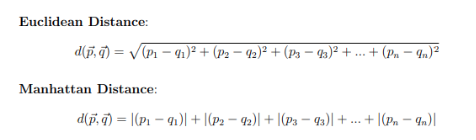











In [ ]:
# data will be sorted here and k values will be selected to check the majority
def Sort_and_Majority_cal(pos,value,value_of_k):
  val=value
  posi=pos

  Survived_count=0
  unSurvived_count=0
  #print(value)

  for x in range ((len(val)-1)):
    for y in range(x+1,len(val)):
      if(int(val[x])<int(val[y])):
        val[x],val[y] = val[y],val[x]
        posi[x],posi[y] = posi[y],posi[x]

  for x in range(value_of_k):
    if(titanic_dataset['Survived'][posi[x]]== 0):
        unSurvived_count =  unSurvived_count + 1
    else:
        Survived_count =   Survived_count + 1



  if(Survived_count>unSurvived_count):
    #print(Survived_labels[1])
    return Survived_labels[1]
  elif   (Survived_count<unSurvived_count):
    #print(Survived_labels[0])
        return Survived_labels[0]
  else:
    random_label = random.randint(0, 1)
    return Survived_labels[random_label]

    #print(Survived_labels[random_label])


In [ ]:
#Ecludiean Distance will calculated here

def Eulidean_Distance(arrayPredict, value_K):
  pos_dataPoint=[]
  elDistance=[]

  for x in  range(0,len(titanic_dataset)):
    hold_cal=float(0.0)
    for y in range(1,6):

      hold_cal=float(hold_cal) + ((float((titanic_dataset[features_labels[y]][x]) - (arrayPredict[y-1]))))**2

    pos_dataPoint.append(x)
    elDistance.append(ops.sqrt(hold_cal))



  return(Sort_and_Majority_cal(  pos_dataPoint,elDistance,value_K))




#Calling Methods([Pclass ,Sex , Age,  SibSp , Parch , Fare], value_K)
print(Eulidean_Distance([2,3,5,5,3,200.54],3))



No


In [ ]:
#Manhattan  Distance will calculated here
def Manhattan_Distance(arrayPredict, value_K):
  pos_dataPoint=[]
  MHDistance=[]

  for x in  range(0,len(titanic_dataset)):
    hold_cal=float(0.0)
    for y in range(1,6):

      hold_cal=(float(hold_cal) + abs(float((titanic_dataset[features_labels[y]][x]) - (arrayPredict[y-1]))))


    pos_dataPoint.append(x)
    MHDistance.append(hold_cal)


  return Sort_and_Majority_cal(  pos_dataPoint,MHDistance,value_K)


print(Manhattan_Distance([2,3,5,5,3,200.54],3))

No


In [ ]:
# test data calculation area
predictionTest=[]

TruePostive = 0
FlasePostive = 0
TrueNegative = 0
FlaseNegative = 0

for index, example in test_set.iterrows():

    Calc=Eulidean_Distance([example['Pclass'],example['Sex'],example['Age'],example['SibSp'],example['Parch'],example['Fare']],2)

    if int(example['Survived'])== 1 and Calc == 'Yes':
      predictionTest.append(1)
      TruePostive= TruePostive +1

    elif int(example['Survived']) == 0 and Calc == 'No':
        predictionTest.append(0)
        TrueNegative= TrueNegative +1

    elif int(example['Survived']) == 0 and Calc == 'Yes':
        predictionTest.append(1)
        FlasePostive=FlasePostive+1
    elif int(example['Survived']) == 1 and Calc == 'No':
        predictionTest.append(0)
        FlaseNegative=FlaseNegative+1



In [ ]:
def test(k,distanceFunc):
  # test data calculation area
    predictionTest=[]

    TruePostive = 0
    FlasePostive = 0
    TrueNegative = 0
    FlaseNegative = 0
    print('Value of K :',k)
    (print("Fucntion : Euclidean Distance")) if distanceFunc ==1 else print("Fucntion : Manhattan Distance")

    for index, example in test_set.iterrows():

            if(distanceFunc==1):
              Calc=Eulidean_Distance([example['Pclass'],example['Sex'],example['Age'],example['SibSp'],example['Parch'],example['Fare']],k)
            else:
              Calc=Manhattan_Distance([example['Pclass'],example['Sex'],example['Age'],example['SibSp'],example['Parch'],example['Fare']],k)

            if int(example['Survived'])== 1 and Calc == 'Yes':
                  predictionTest.append(1)
                  TruePostive= TruePostive +1

            elif int(example['Survived']) == 0 and Calc == 'No':
                 predictionTest.append(0)
                 TrueNegative= TrueNegative +1

            elif int(example['Survived']) == 0 and Calc == 'Yes':
                  predictionTest.append(1)
                  FlasePostive=FlasePostive+1
            elif int(example['Survived']) == 1 and Calc == 'No':
                   predictionTest.append(0)
                   FlaseNegative=FlaseNegative+1


    Accuracy = (TruePostive+TrueNegative)/(TruePostive+TrueNegative + FlasePostive+FlaseNegative)

    Precision = 0
    Recall = 0
    F1_Score=0
    try:
       Precision = (TruePostive)/(TruePostive+FlasePostive)
    except:
      Precision = 0
    try:
          Recall = (TruePostive)/(TruePostive+FlaseNegative)
    except:
         Recall = 0
    try:
                F1_Score= (2) *((Precision*Recall)/(Precision+Recall))
    except:
             F1_Score= 0


    print("Accuracy: ",Accuracy)
    print("F1_Score :",F1_Score)

    %matplotlib inline
    # Create a confusion matrix using these values
    confusion_matrix = np.array([[TrueNegative, FlasePostive], [FlaseNegative, TruePostive]])
    # Plot and display the confusion matrix
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=["False", "True"])
    cm_display.plot()
   # Save the figure to 'confusion_matrix.png'
    plt.savefig('confusion_matrix.png')
    plt.show()
    return F1_Score

Value of K : 1
Fucntion : Euclidean Distance
Accuracy:  0.45714285714285713
F1_Score : 0.5365853658536586


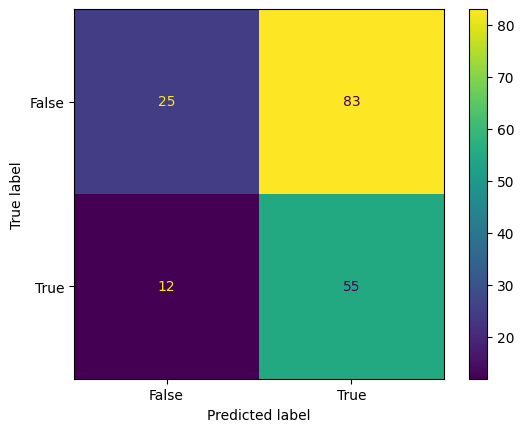

Value of K : 2
Fucntion : Euclidean Distance
Accuracy:  0.46285714285714286
F1_Score : 0.40506329113924056


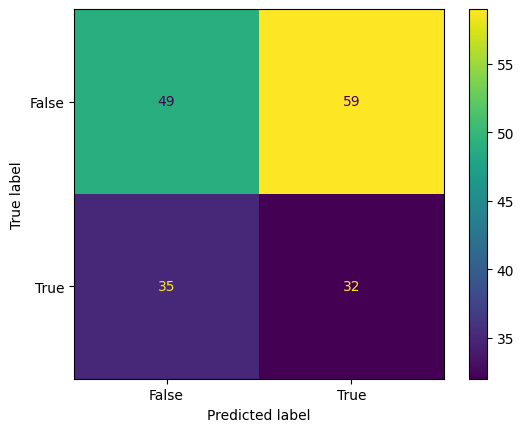

Value of K : 3
Fucntion : Euclidean Distance
Accuracy:  0.6057142857142858
F1_Score : 0.08


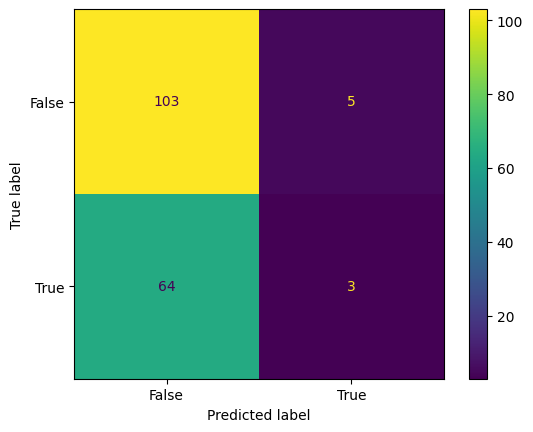

Value of K : 4
Fucntion : Euclidean Distance
Accuracy:  0.5714285714285714
F1_Score : 0.1935483870967742


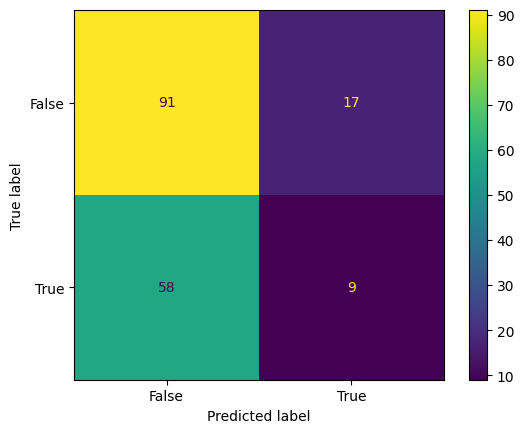

Value of K : 5
Fucntion : Euclidean Distance
Accuracy:  0.6057142857142858
F1_Score : 0.08


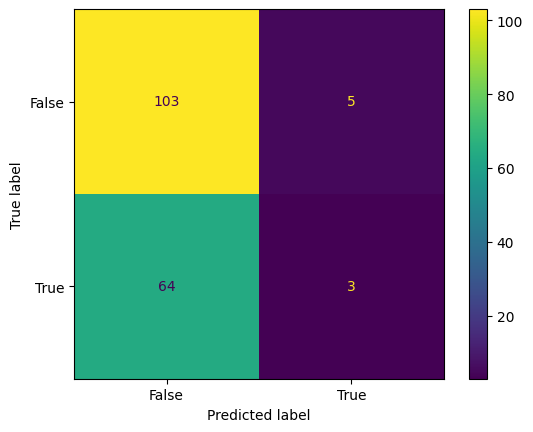

Value of K : 6
Fucntion : Euclidean Distance
Accuracy:  0.5771428571428572
F1_Score : 0.22916666666666666


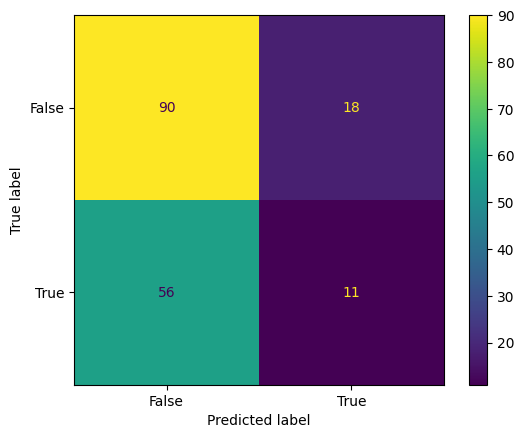

Value of K : 7
Fucntion : Euclidean Distance
Accuracy:  0.6057142857142858
F1_Score : 0.08


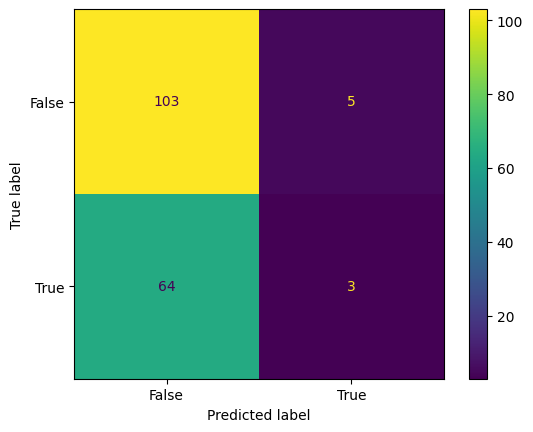

In [ ]:
values_of_k=[1,2,3,4,5,6,7]
F1_list_1=[]
for x in values_of_k:
 F1_list_1.append (test(x,1))

Value of K : 1
Fucntion : Manhattan Distance
Accuracy:  0.45714285714285713
F1_Score : 0.5177664974619289


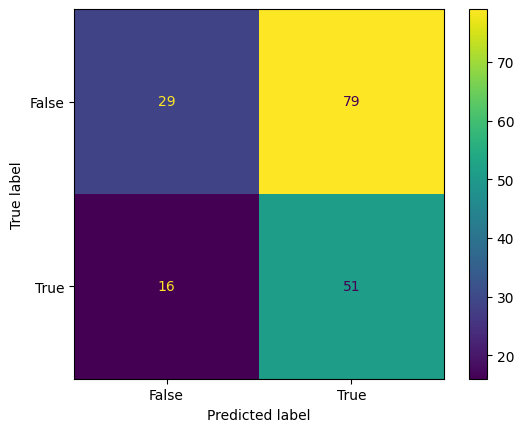

Value of K : 2
Fucntion : Manhattan Distance
Accuracy:  0.5314285714285715
F1_Score : 0.3787878787878788


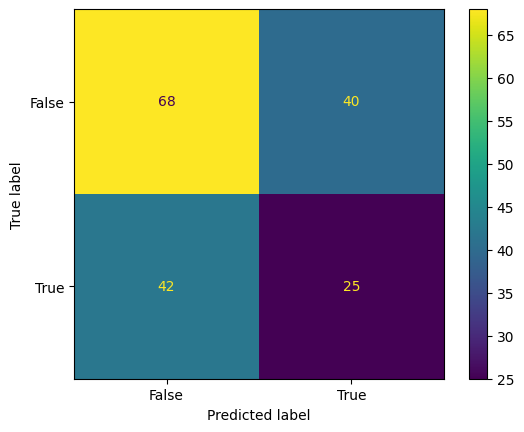

Value of K : 3
Fucntion : Manhattan Distance
Accuracy:  0.6171428571428571
F1_Score : 0


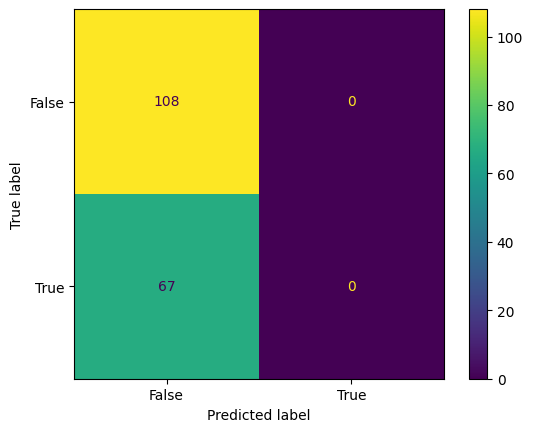

Value of K : 4
Fucntion : Manhattan Distance
Accuracy:  0.6171428571428571
F1_Score : 0


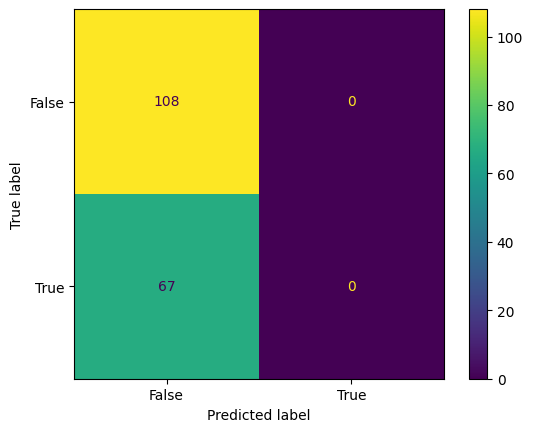

Value of K : 5
Fucntion : Manhattan Distance
Accuracy:  0.6171428571428571
F1_Score : 0


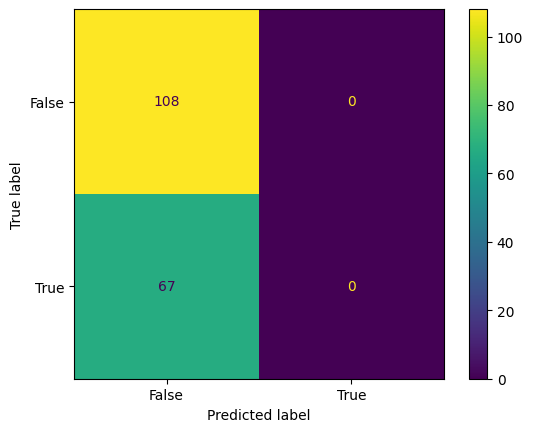

Value of K : 6
Fucntion : Manhattan Distance
Accuracy:  0.6171428571428571
F1_Score : 0


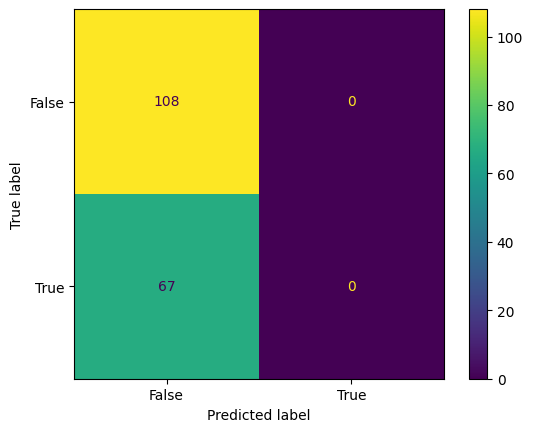

Value of K : 7
Fucntion : Manhattan Distance
Accuracy:  0.6171428571428571
F1_Score : 0


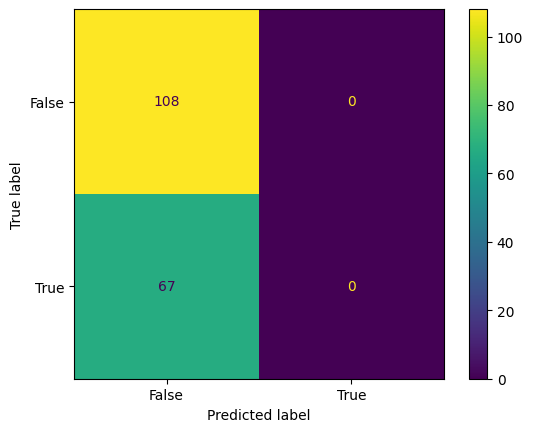

In [ ]:
values_of_k=[1,2,3,4,5,6,7]
F1_list_2=[]
for x in values_of_k:
 F1_list_2.append (test(x,2))

<Figure size 4400x4400 with 0 Axes>

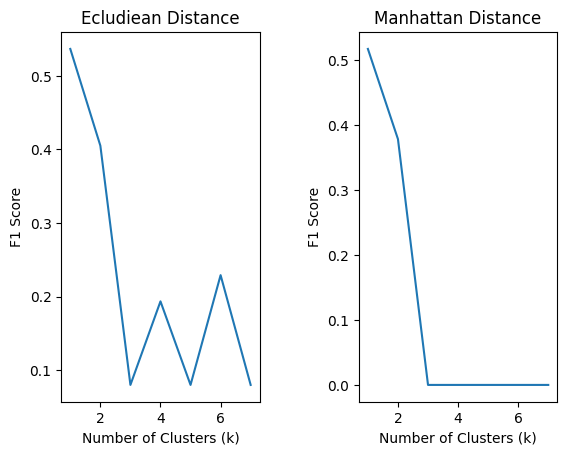

In [ ]:
plt.figure(figsize=(44, 44))

figure, axis = plt.subplots(1, 2)
plt.subplots_adjust(wspace=0.5)
axis[0].plot(np.array(values_of_k),np.array(F1_list_1))
axis[0].set_title("Ecludiean Distance")
axis[0].set_xlabel("Number of Clusters (k)")
axis[0].set_ylabel("F1 Score")
axis[1].set_xlabel("Number of Clusters (k)")
axis[1].set_ylabel("F1 Score")

axis[1].set_title("Manhattan Distance")
axis[1].plot(np.array(values_of_k),np.array(F1_list_2))

plt.show()


<br>
<br>
<br>
<br>
<br>
<h1>------------------Task 2 SKlearn KNN Implementation-------------------------------</h1>

<br>
<br>
<br>
<br>



In [ ]:
# Extracting Labels from dataset
x_label=titanic_dataset.pop('Survived')
y_label=test_set.pop('Survived')

In [ ]:
y_label.head()

0    1
1    1
2    1
3    0
4    1
Name: Survived, dtype: object

In [ ]:
# Standardrizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(titanic_dataset)

X_train = scaler.transform(titanic_dataset)
X_test = scaler.transform(test_set)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score
def defaultKNN(k,Dfunc):
  # Passing the trainset and its labels to the KNN model
  if Dfunc ==1:
      classifier = KNeighborsClassifier(n_neighbors=k)
      print('Function : Ecludiean Distance')
  else:
      classifier = KNeighborsClassifier(n_neighbors=k,metric="manhattan")
      print('Function : Manhattan Distance')


  classifier.fit(X_train, list(x_label))
  # predict on test set
  y_pred = classifier.predict(X_test)
  #  printing the confusionn matrix
  #print(confusion_matrix(list(y_label), y_pred))
  #print(classification_report(list(y_label), y_pred))
  #  Accuracy
  accuracy = accuracy_score(list(y_label), y_pred)
  print("Accuracy:", accuracy)
  # F1Score
  F1 = f1_score(list(y_label), y_pred)
  print("Accuracy:", F1)
  # #  printing the confusionn matrix
  %matplotlib inline
  # Create a confusion matrix using these values
  confusion_matrixa = confusion_matrix(list(y_label), y_pred)
  # Plot and display the confusion matrix
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrixa, display_labels=["False", "True"])
  cm_display.plot()
  plt.show()
  return F1

Function : Ecludiean Distance
Accuracy: 0.7906976744186046
Accuracy: 0.7230769230769231


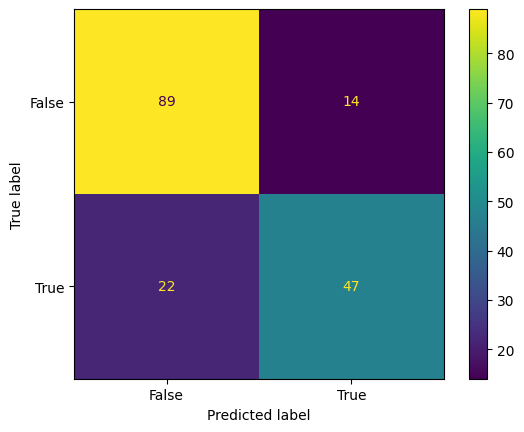

Function : Ecludiean Distance
Accuracy: 0.7906976744186046
Accuracy: 0.6785714285714286


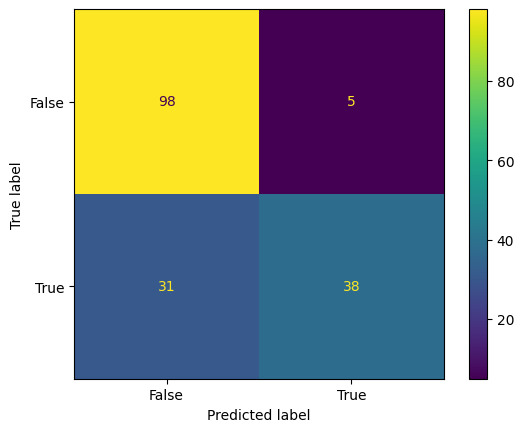

Function : Ecludiean Distance
Accuracy: 0.7965116279069767
Accuracy: 0.7286821705426356


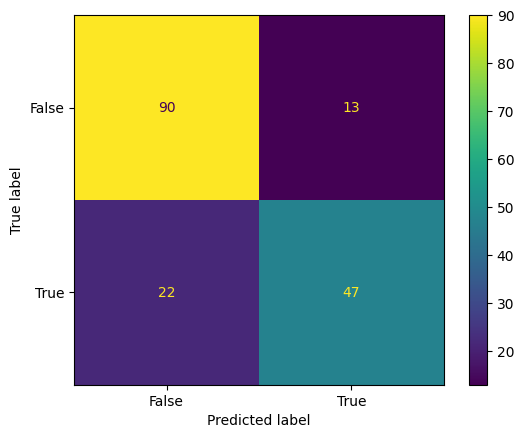

Function : Ecludiean Distance
Accuracy: 0.7906976744186046
Accuracy: 0.7096774193548386


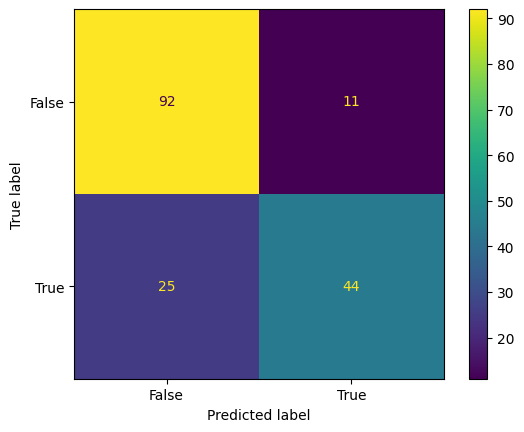

Function : Ecludiean Distance
Accuracy: 0.7790697674418605
Accuracy: 0.6984126984126984


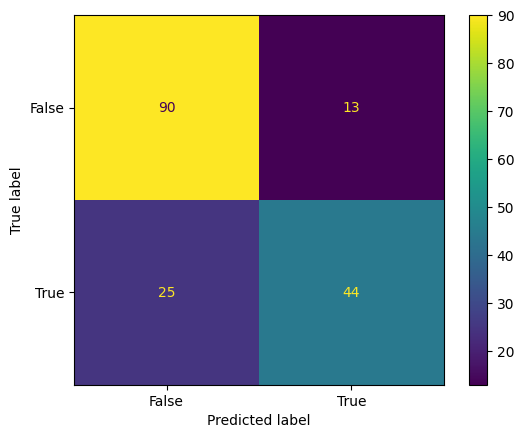

Function : Ecludiean Distance
Accuracy: 0.7848837209302325
Accuracy: 0.6942148760330579


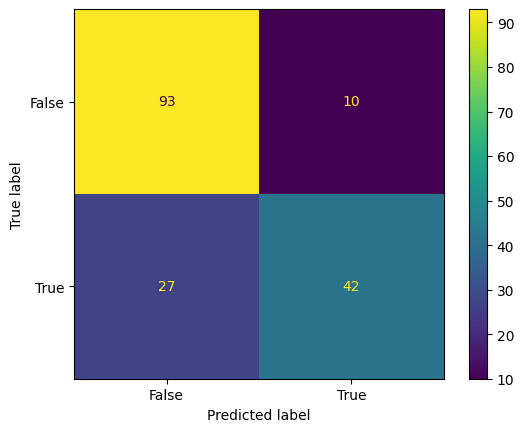

Function : Ecludiean Distance
Accuracy: 0.7790697674418605
Accuracy: 0.6935483870967741


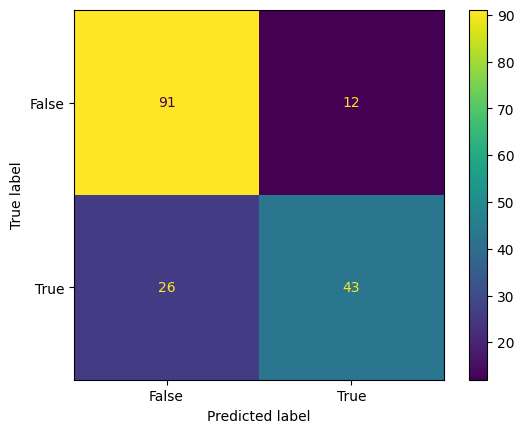

In [ ]:
F1_list_E=[]
for x in values_of_k:
  F1_list_E.append(defaultKNN(x,1))



Function : Manhattan Distance
Accuracy: 0.7848837209302325
Accuracy: 0.7175572519083969


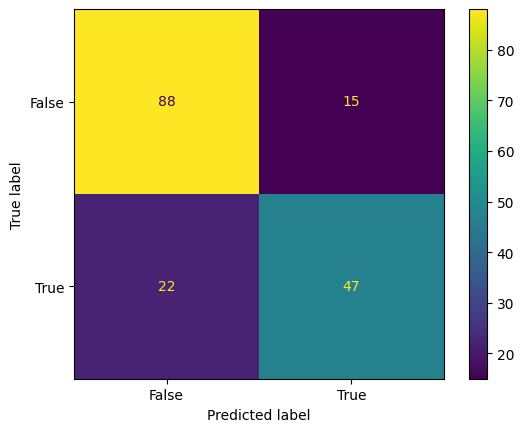

Function : Manhattan Distance
Accuracy: 0.7848837209302325
Accuracy: 0.672566371681416


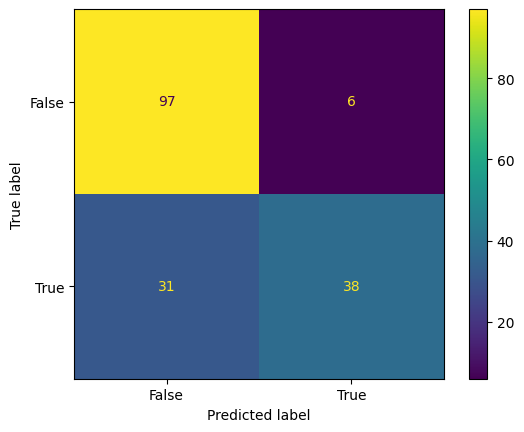

Function : Manhattan Distance
Accuracy: 0.7906976744186046
Accuracy: 0.7230769230769231


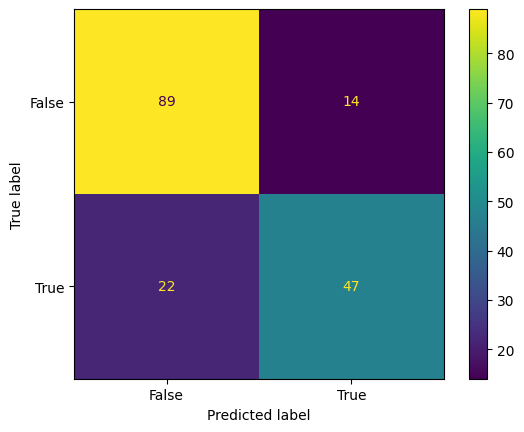

Function : Manhattan Distance
Accuracy: 0.7848837209302325
Accuracy: 0.6991869918699186


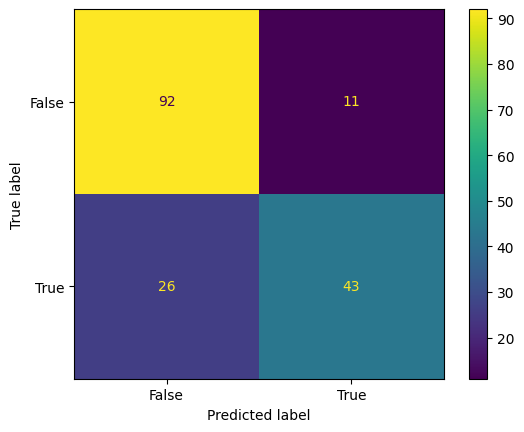

Function : Manhattan Distance
Accuracy: 0.7790697674418605
Accuracy: 0.703125


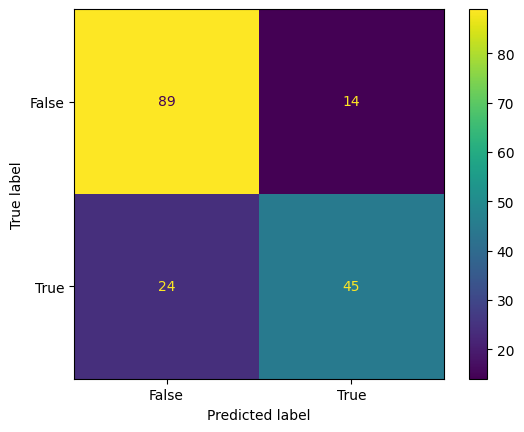

Function : Manhattan Distance
Accuracy: 0.7674418604651163
Accuracy: 0.6721311475409837


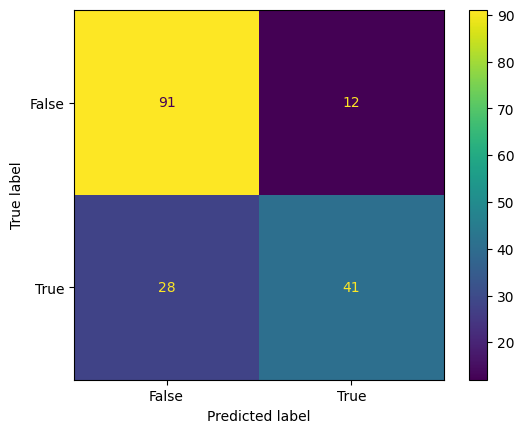

Function : Manhattan Distance
Accuracy: 0.7732558139534884
Accuracy: 0.6929133858267716


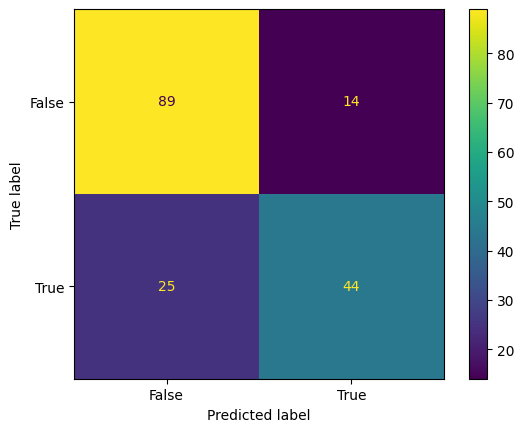

In [ ]:
F1_list_M=[]
for x in values_of_k:
  F1_list_M.append(defaultKNN(x,2))

<Figure size 4400x4400 with 0 Axes>

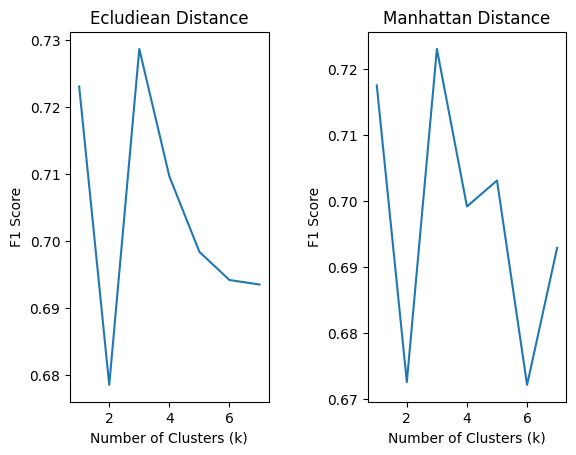

In [ ]:
plt.figure(figsize=(44, 44))

figure, axis = plt.subplots(1, 2)
plt.subplots_adjust(wspace=0.5)
axis[0].plot(np.array(values_of_k),np.array(F1_list_E))
axis[0].set_title("Ecludiean Distance")
axis[0].set_xlabel("Number of Clusters (k)")
axis[0].set_ylabel("F1 Score")
axis[1].set_xlabel("Number of Clusters (k)")
axis[1].set_ylabel("F1 Score")

axis[1].set_title("Manhattan Distance")
axis[1].plot(np.array(values_of_k),np.array(F1_list_M))

plt.show()